## Credit Risk Assessment

Created By : Rafif Noor Audryan
<br>linkedin : https://www.linkedin.com/in/rafif-noor-audryan/

### Objective

1. Membuat model yang dapat memprediksi apakah calon customer dapat dikategorikan Good loan borrower atau Bad loan borrower
2. Interpretasi fitur penting yang didapatkan oleh model

### Import Library and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Terdapat beberapa kolom yang memiliki nilai null sehingga perlu dilakukan **Cleansing**

In [4]:
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
26251,26251,573020,712620,13000,13000,12730.274,60 months,16.32,318.35,D,D5,william backus hospital,9 years,OWN,36000.0,Verified,Sep-10,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 07/27/10 > work full time wi...,credit_card,credit cards,063xx,CT,21.47,0.0,Nov-95,0.0,NaN,96.0,10.0,1.0,7216,77.6,23.0,f,0.00,0.00,14817.36000,14266.41,8352.62,5836.43,0.0,628.31,6.2831,Sep-14,150.00,NaN,Oct-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466238,466238,9807230,11659136,14000,14000,14000.000,36 months,12.85,470.71,B,B4,DAY CARE OWNER,10+ years,MORTGAGE,95000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/13 > I'm just lookin...,debt_consolidation,CREDIT CARD PAYOFF,640xx,MO,8.72,0.0,May-94,1.0,NaN,NaN,22.0,0.0,24037,32.9,34.0,w,5274.03,5274.03,11297.04000,11297.04,8725.97,2571.07,0.0,0.00,0.0000,Jan-16,470.71,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,150099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73100.0,NaN,NaN,NaN
8962,8962,857637,1070126,14000,14000,14000.000,60 months,11.99,311.36,B,B5,RR Donnelley,< 1 year,MORTGAGE,76000.0,Not Verified,Aug-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 08/19/11 > I plan to use t...,debt_consolidation,Debt Consolidation,774xx,TX,19.52,0.0,Jan-95,0.0,NaN,NaN,12.0,0.0,32213,79.0,27.0,f,0.00,0.00,16019.93000,16019.93,14000.00,2019.93,0.0,0.00,0.0000,Jan-13,11357.91,NaN,Feb-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307518,307518,27570359,30073428,20000,20000,20000.000,36 months,10.15,646.76,B,B2,waitress,10+ years,RENT,54000.0,Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,606xx,IL,2.71,0.0,Feb-92,0.0,34.0,NaN,9.0,0.0,4891,16.4,27.0,f,9584.74,9584.74,12348.16000,12348.16,10415.26,1932.90,0.0,0.00,0.0000,Jan-16,646.76,Feb-16,Jan-16,0.0,34.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
21536,21536,642853,822754,7900,7900,7900.000,60 months,14.83,187.24,D,D3,Department of Veterans Affairs,< 1 year,MORTGAGE,95500.0,Not Verified,Jan-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,Small Business Loan,350xx,AL,15.19,1.0,Sep-87,4.0,14.0,NaN,16.0,0.0,52264,41.0,30.0,f,0.00,0.00,10648.37669,10648.38,7900.01,2748.37,0.0,0.00,0.0000,Feb-14,3927.72,NaN,Apr-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Membuang kolom `Unnamed: 0` karena  hanya sebuah urutan index dalam dataset

In [5]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleansing

In [6]:
df_clean = df.copy()

In [7]:
cat = df_clean.select_dtypes(include = 'object')
numerical = df_clean.select_dtypes(exclude = 'object')
cat_cols = cat.columns.to_list()
numerical_cols = numerical.columns.to_list()
print('Data category: ',cat_cols)
print('Data numerik: ',numerical_cols)

Data category:  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']
Data numerik:  ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open

In [8]:
df_clean[numerical_cols].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

* Terlihat beberapa fitur memiliki semua nilai null sehingga perlu dibuang

In [9]:
df_clean[cat_cols].describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


* Beberapa fitur kategorik memiliki bentuk data yang seharusnya bertipe waktu namun masih bertipe object dalam dataset ini<br>
* Beberapa fiture kategorik juga memiliki unique value yang terlalu banyak sehingga ada kemungkinan untuk dibuang saja

### Check Duplicated Values

In [10]:
df_clean.duplicated().sum()

0

* Terlihat tidak ada data yang duplikat sehingga satu baris sudah mewakili satu individu

### Check Missing Value

In [11]:
# Total null values
total_null = df_clean.isnull().sum()
percent_missing = df_clean.isnull().sum() * 100/ len(df)
dtypes = [df[col].dtype for col in df.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
df_missing_value[df_missing_value['percent_missing']>0]

,total_null,data_type,percent_missing
inq_last_12m,466285,float64,100.000000
verification_status_joint,466285,float64,100.000000
open_acc_6m,466285,float64,100.000000
open_il_6m,466285,float64,100.000000
open_il_12m,466285,float64,100.000000
open_il_24m,466285,float64,100.000000
mths_since_rcnt_il,466285,float64,100.000000
dti_joint,466285,float64,100.000000
total_bal_il,466285,float64,100.000000
annual_inc_joint,466285,float64,100.000000


Missing Vales > 50%
* mths_since_last_record = The number of months since the last public record.
* mths_since_last_major_derog = Months since most recent 90-day or worse rating
* desc = Loan description provided by the borrower
* mths_since_last_delinq = The number of months since the borrower's last delinquency.

Missing Values 5% - 50%
* next_payment_d = Next scheduled payment date
* tot_coll_amt = Total collection amounts ever owed
* tot_cur_bal = Total current balance of all accounts
* total_rev_hi_lim = Total revolving high credit/credit limit

Missing Values 1% - 5%
* emp_title = The job title supplied by the Borrower when applying for the loan.*
* emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

Missing Values < 1%
* last_pymnt_d = Last month payment was received
* revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.        
* collection_12_mths_ex_med = Number of collections in 12 months excluding medical collections
* last_credit_pull_d = The most recent month LC pulled credit for this loan
* pub_rec = Number of derogatory public records
* inq_last_6mths = The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
* delinq_2yrs = The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* open_acc = The number of open credit lines in the borrower's credit file.
* earliest_cr_line = The month the borrower's earliest reported credit line was opened
* acc_now_delinq = The number of accounts on which the borrower is now delinquent.
* total_acc = The total number of credit lines currently in the borrower's credit file
* title = The loan title provided by the borrower


## Handling Missing Value

Terdapat 21 fitur yang seluruhnya berisi data null dan lebih dari 50 % berisi data null sehingga fitur tersebut di buang

In [12]:
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 50].index.tolist()
df_clean.drop(columns=col_full_null, inplace = True)

In [13]:
df_clean.isnull().sum().sort_values(ascending = False)

next_pymnt_d                  227214
total_rev_hi_lim               70276
tot_cur_bal                    70276
tot_coll_amt                   70276
emp_title                      27588
emp_length                     21008
last_pymnt_d                     376
revol_util                       340
collections_12_mths_ex_med       145
last_credit_pull_d                42
delinq_2yrs                       29
acc_now_delinq                    29
total_acc                         29
pub_rec                           29
open_acc                          29
earliest_cr_line                  29
inq_last_6mths                    29
title                             20
annual_inc                         4
pymnt_plan                         0
installment                        0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
grade                              0
last_pymnt_amnt                    0
i

* Untuk fitur `tot_coll_amt`,`tot_cur_bal`,`total_rev_hi_lim` nilai null akan diganti dengan "0" karena asumsinya customer tersebut memang tidak meminjam uang lagi

In [14]:
for col in ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']:
    df_clean[col] = df_clean[col].fillna(0)

In [15]:
df_clean[['next_pymnt_d','tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].isnull().sum()

next_pymnt_d        227214
tot_coll_amt             0
tot_cur_bal              0
total_rev_hi_lim         0
dtype: int64

Untuk fitur lain yang bertipe data numerik,terlihat distribusi data skew sehingga nilai null akan diganti dengan nilai **Median**

In [16]:
# Numerical columns
for col in df_clean.select_dtypes(exclude = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())
df_clean.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
inq_last_6mths                     0
o

Untuk fitur lain yang bertipe data kategorik, nilai null akan diganti dengan nilai **Modus**

In [17]:
# Categorical columns
for col in df_clean.select_dtypes(include = 'object'):
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode().iloc[0])
df_clean.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [18]:
df_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Feb-16,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Feb-16,Jan-15,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0,0.0


In [19]:
df_clean.shape

(466285, 53)

## Check Target Value

### Target Feature : `loan_status`

In [20]:
df_clean['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [21]:
df_clean['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

* Terdapat 9 unique value pada kolom loan_status yang akan menjadi target model.<br>
* Dibagi menjadi dua kelompok seperi klasifikasi binary yaitu "good_loan" dengan angka 1 dan "bad_loan" dengan angka 0<br>
* good_loan didefinisikan memiliki loan status `Current` artinya pembayaran lancar,`Fully Paid`artinya pembayaran lunas, dan `In Grace Period` artinya dalam masa tenggang<br>
bad_loan didefinisikan memiliki loan status selain dari good_loan

In [22]:
good_loan = ['Current','Fully Paid','In Grace Period']
df_clean['loan_status'] = np.where(df_clean['loan_status'].isin(good_loan),1,0)
df_clean['loan_status'].value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

### Drop Unnecesary Column

Pembuangan fitur seperti fitur yang merupakan id unik, berupa free text

In [23]:
df_clean.drop(columns=['id','member_id','url','title','addr_state','zip_code','policy_code','application_type','emp_title'], inplace = True)

In [24]:
df_cleaned = df_clean.copy()

## Feature Engineering

### Date Time Feature : 'earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d'

In [25]:
time = ['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']
for col in time:
    print(df_cleaned[col].unique())
    print('\n')

['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Jan-96' 'Nov-04' 'Jul-05' 'Jan-07'
 'Apr-04' 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98'
 'Aug-93' 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01'
 'Feb-02' 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Feb-97' 'Apr-05' 'Oct-07'
 'Dec-00' 'Apr-07' 'Dec-01' 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95'
 'Jul-99' 'Jun-95' 'Sep-92' 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98'
 'Dec-04' 'Oct-00' 'May-02' 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05'
 'Apr-95' 'Oct-02' 'Jan-00' 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99'
 'Nov-03' 'Jun-89' 'Jun-03' 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96'
 'Feb-84' 'Sep-02' 'Jan-86' 'May-98' 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04'
 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97' 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00'
 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91' 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05'
 'Nov-05' 'Nov-00' 'May-07' 'Jan-91' 'Jun-00' 'Aug-06' 'Dec-02' 'Jun-93'
 'Jun-06' 'Feb-04' 'Dec-90' 'Mar-00' 'Feb-95' 'Jul-

In [26]:
df_cleaned['earliest_cr_line'] = pd.to_datetime(df_cleaned['earliest_cr_line'], format = '%b-%y')
df_cleaned['last_credit_pull_d'] = pd.to_datetime(df_cleaned['last_credit_pull_d'], format = '%b-%y')
df_cleaned['last_pymnt_d'] = pd.to_datetime(df_cleaned['last_pymnt_d'], format = '%b-%y')
df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d'], format = '%b-%y')
df_cleaned['next_pymnt_d'] = pd.to_datetime(df_cleaned['next_pymnt_d'], format = '%b-%y')

In [27]:
df_cleaned[['earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d','next_pymnt_d']].head()

,earliest_cr_line,last_credit_pull_d,last_pymnt_d,issue_d,next_pymnt_d
0,1985-01-01,2016-01-01,2015-01-01,2011-12-01,2016-02-01
1,1999-04-01,2013-09-01,2013-04-01,2011-12-01,2016-02-01
2,2001-11-01,2016-01-01,2014-06-01,2011-12-01,2016-02-01
3,1996-02-01,2015-01-01,2015-01-01,2011-12-01,2016-02-01
4,1996-01-01,2016-01-01,2016-01-01,2011-12-01,2016-02-01


Adding New Feature :<br>
* `pymnt_time` = the number of month between `next_pymnt_d` and `last_pymnt_d`
* `credit_pull_year` = the number of year between `earliest_cr_line` and `last_credit_pull_d`

In [28]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [29]:
df_cleaned['pymnt_time'] = df_cleaned.apply(lambda x: diff_month(x.next_pymnt_d, x.last_pymnt_d), axis=1)
df_cleaned['credit_pull_year'] = df_cleaned.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)

* Terdapat nilai negatif pada fitur `pymnt_time` maka akan diganti nilainya dengan 0 karena asumsinya bahwa customer tidak memiliki tagihan untuk melakukan pembayaran 

In [30]:
df_cleaned[df_cleaned['pymnt_time']<0][['next_pymnt_d','last_pymnt_d','pymnt_time']]

,next_pymnt_d,last_pymnt_d,pymnt_time
40122,2011-02-01,2016-01-01,-59
40481,2010-10-01,2016-01-01,-63
40498,2010-10-01,2016-01-01,-63
40753,2010-06-01,2016-01-01,-67
40769,2010-06-01,2016-01-01,-67
40785,2010-06-01,2016-01-01,-67
40848,2010-05-01,2016-01-01,-68
40914,2010-04-01,2016-01-01,-69
40927,2010-04-01,2016-01-01,-69
41145,2009-11-01,2016-01-01,-74


In [31]:
df_cleaned.loc[df_cleaned['pymnt_time'] < 0,'pymnt_time'] = 0

In [32]:
df_cleaned['pymnt_time'].describe()

count    466285.000000
mean          8.911018
std          12.253806
min           0.000000
25%           1.000000
50%           2.000000
75%          13.000000
max          97.000000
Name: pymnt_time, dtype: float64

* Terdapat kesalahan input pada fitur `earliest_cr_line` sehingga memunculkan nilai `credit_pull_year` negatif sehingga baris dengan nilai tersebut akan diganti dengan nilai maximum fitur credit_pull_year

In [33]:
df_cleaned[df_cleaned['credit_pull_year']<0][['earliest_cr_line','last_credit_pull_d','credit_pull_year']]

,earliest_cr_line,last_credit_pull_d,credit_pull_year
1580,2062-09-01,2013-09-01,-49
1770,2068-09-01,2015-09-01,-53
2799,2064-09-01,2016-01-01,-48
3282,2067-09-01,2015-05-01,-52
3359,2065-02-01,2014-11-01,-51
...,...,...,...
464003,2068-01-01,2016-01-01,-52
464260,2066-07-01,2015-12-01,-51
465100,2067-10-01,2016-01-01,-51
465500,2067-09-01,2015-09-01,-52


In [34]:
df_cleaned.loc[df_cleaned['credit_pull_year'] < 0,'credit_pull_year'] = df_cleaned['credit_pull_year'].max()

In [35]:
df_cleaned['credit_pull_year'].describe()

count    466285.000000
mean         18.267693
std           7.279543
min           1.000000
25%          13.000000
50%          17.000000
75%          22.000000
max          47.000000
Name: credit_pull_year, dtype: float64

### Date Time Feature : `term` to integer

In [36]:
df_cleaned['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [37]:
df_cleaned['term'] = df_cleaned['term'].apply(lambda term: int(term[:3]))

In [38]:
df_cleaned['term'].value_counts()

36    337953
60    128332
Name: term, dtype: int64

### Drop column that already extract

In [39]:
df_cleaned.drop(columns=['issue_d','earliest_cr_line','next_pymnt_d','last_pymnt_d','last_credit_pull_d'], inplace = True)

In [40]:
df_cleaned.shape

(466285, 41)

### EDA

In [41]:
df_eda = df_cleaned.copy()

In [42]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

In [43]:
num

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'pymnt_time',
       'credit_pull_year'],
      dtype='object')

In [44]:
cat

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'],
      dtype='object')

<AxesSubplot:>

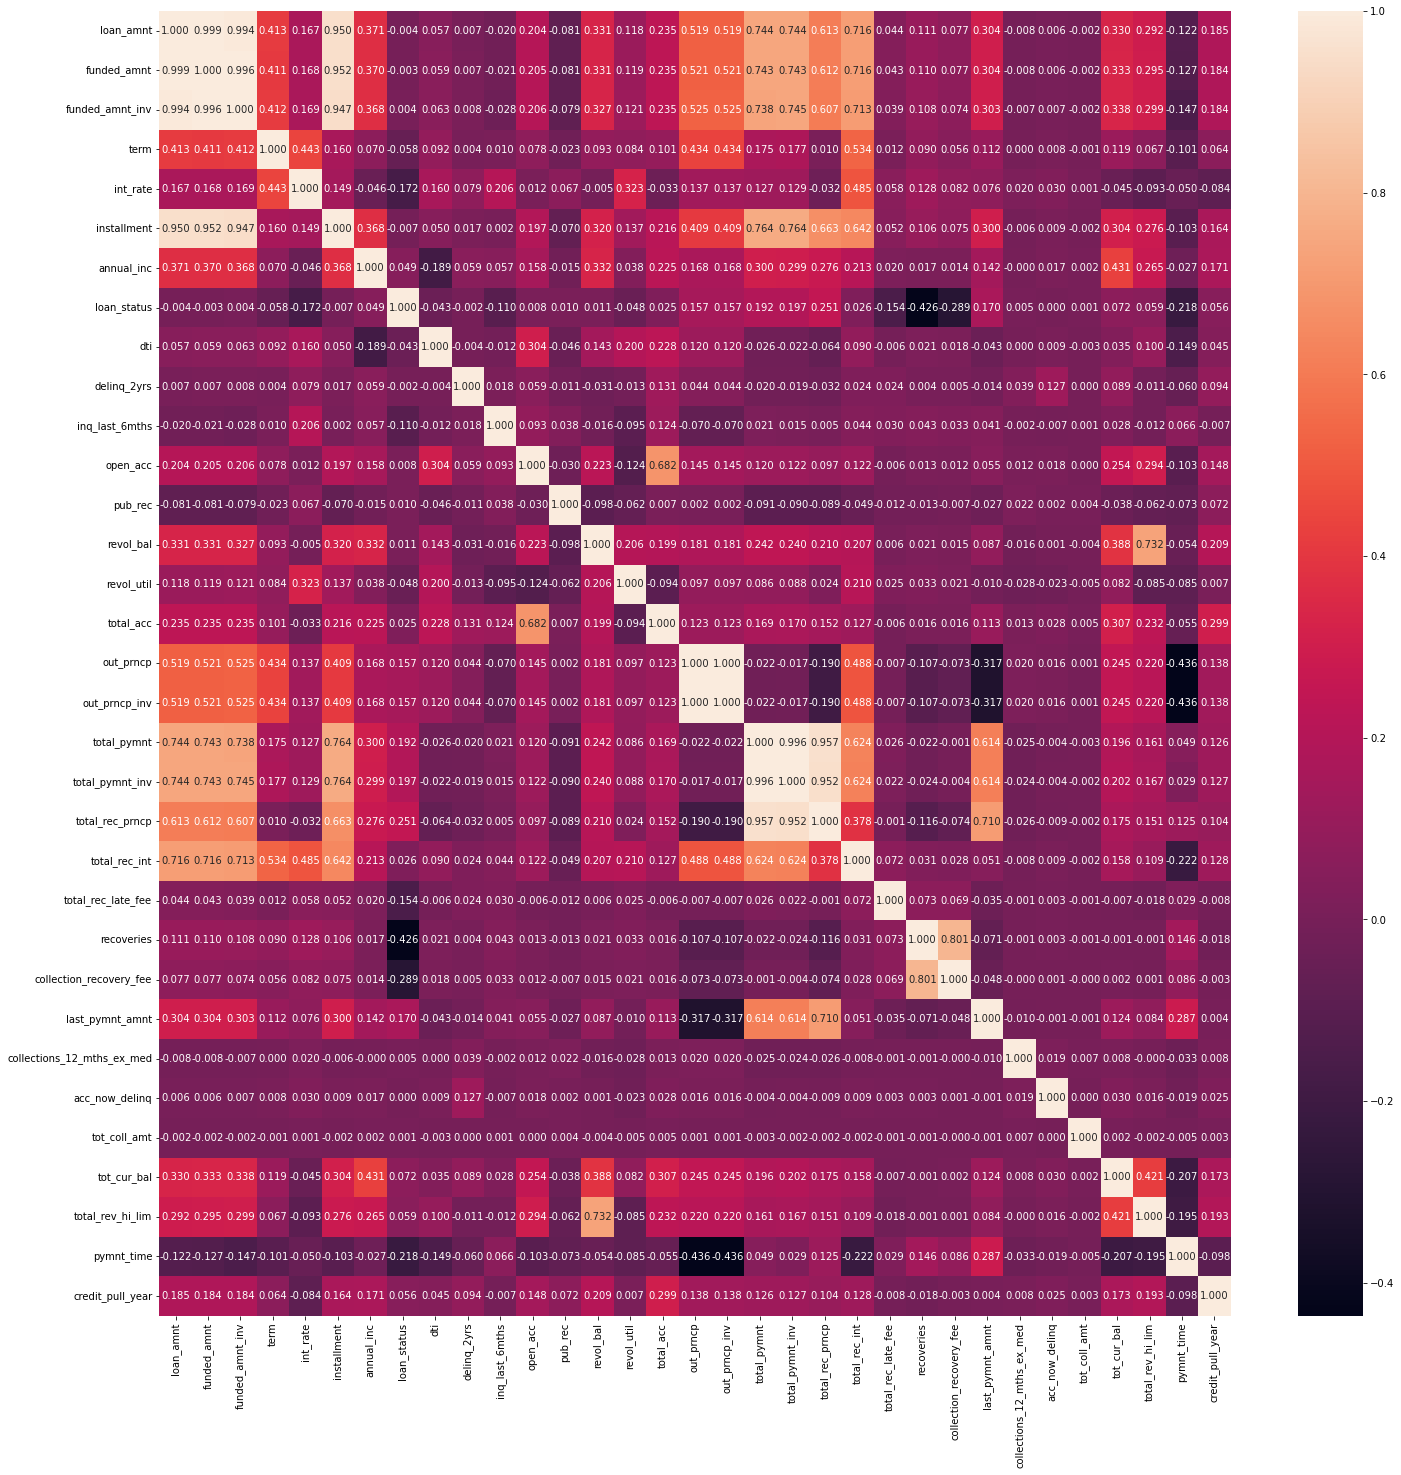

In [45]:
plt.figure(figsize=(24,24))
sns.heatmap(df_eda.corr(),annot=True,fmt='.3f')

* Terlihat ada beberapa fitur independen saling berkolerasi tinggi antar fitur sehingga dapat menimbulkan hasil yang bias jika dibiarkan.
* Memutuskan untuk membuang fitur yang berkoleasi lebih dari 0.8

In [46]:
corr_matrix = df_eda.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_multicol = [column for column in upper.columns if any(upper[column] > 0.8)]

In [47]:
high_multicol

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee']

In [48]:
df_eda.drop(high_multicol, axis=1, inplace=True)

In [49]:
df_eda.shape

(466285, 34)

In [50]:
df_eda[cat].nunique()

grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
initial_list_status     2
dtype: int64

* grade dan sub_grade memiliki kemiripan interpretasi,sehingga memutuskan untuk membuang fitur sub_grade karena telah diwakili oleh grade

In [51]:
df_eda.drop(['sub_grade'], axis=1, inplace=True)

In [52]:
df_eda.select_dtypes(include='number').nunique()

loan_amnt                       1352
term                               2
int_rate                         506
annual_inc                     31901
loan_status                        2
dti                             3997
delinq_2yrs                       24
inq_last_6mths                    28
open_acc                          62
pub_rec                           26
revol_bal                      58142
revol_util                      1269
total_acc                        112
out_prncp                     135665
total_pymnt                   351609
total_rec_int                 270249
total_rec_late_fee              5808
recoveries                     22773
last_pymnt_amnt               198194
collections_12_mths_ex_med         9
acc_now_delinq                     6
tot_coll_amt                    6321
tot_cur_bal                   220690
total_rev_hi_lim               14612
pymnt_time                        98
credit_pull_year                  47
dtype: int64

* Terlihat fitur numerik sudah tidak ada yang bermasalah

In [53]:
df_eda.shape

(466285, 33)

## Univariate Analysis

### Numeric Feature

In [54]:
len(df_eda.select_dtypes(include='number').columns)

26

In [55]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

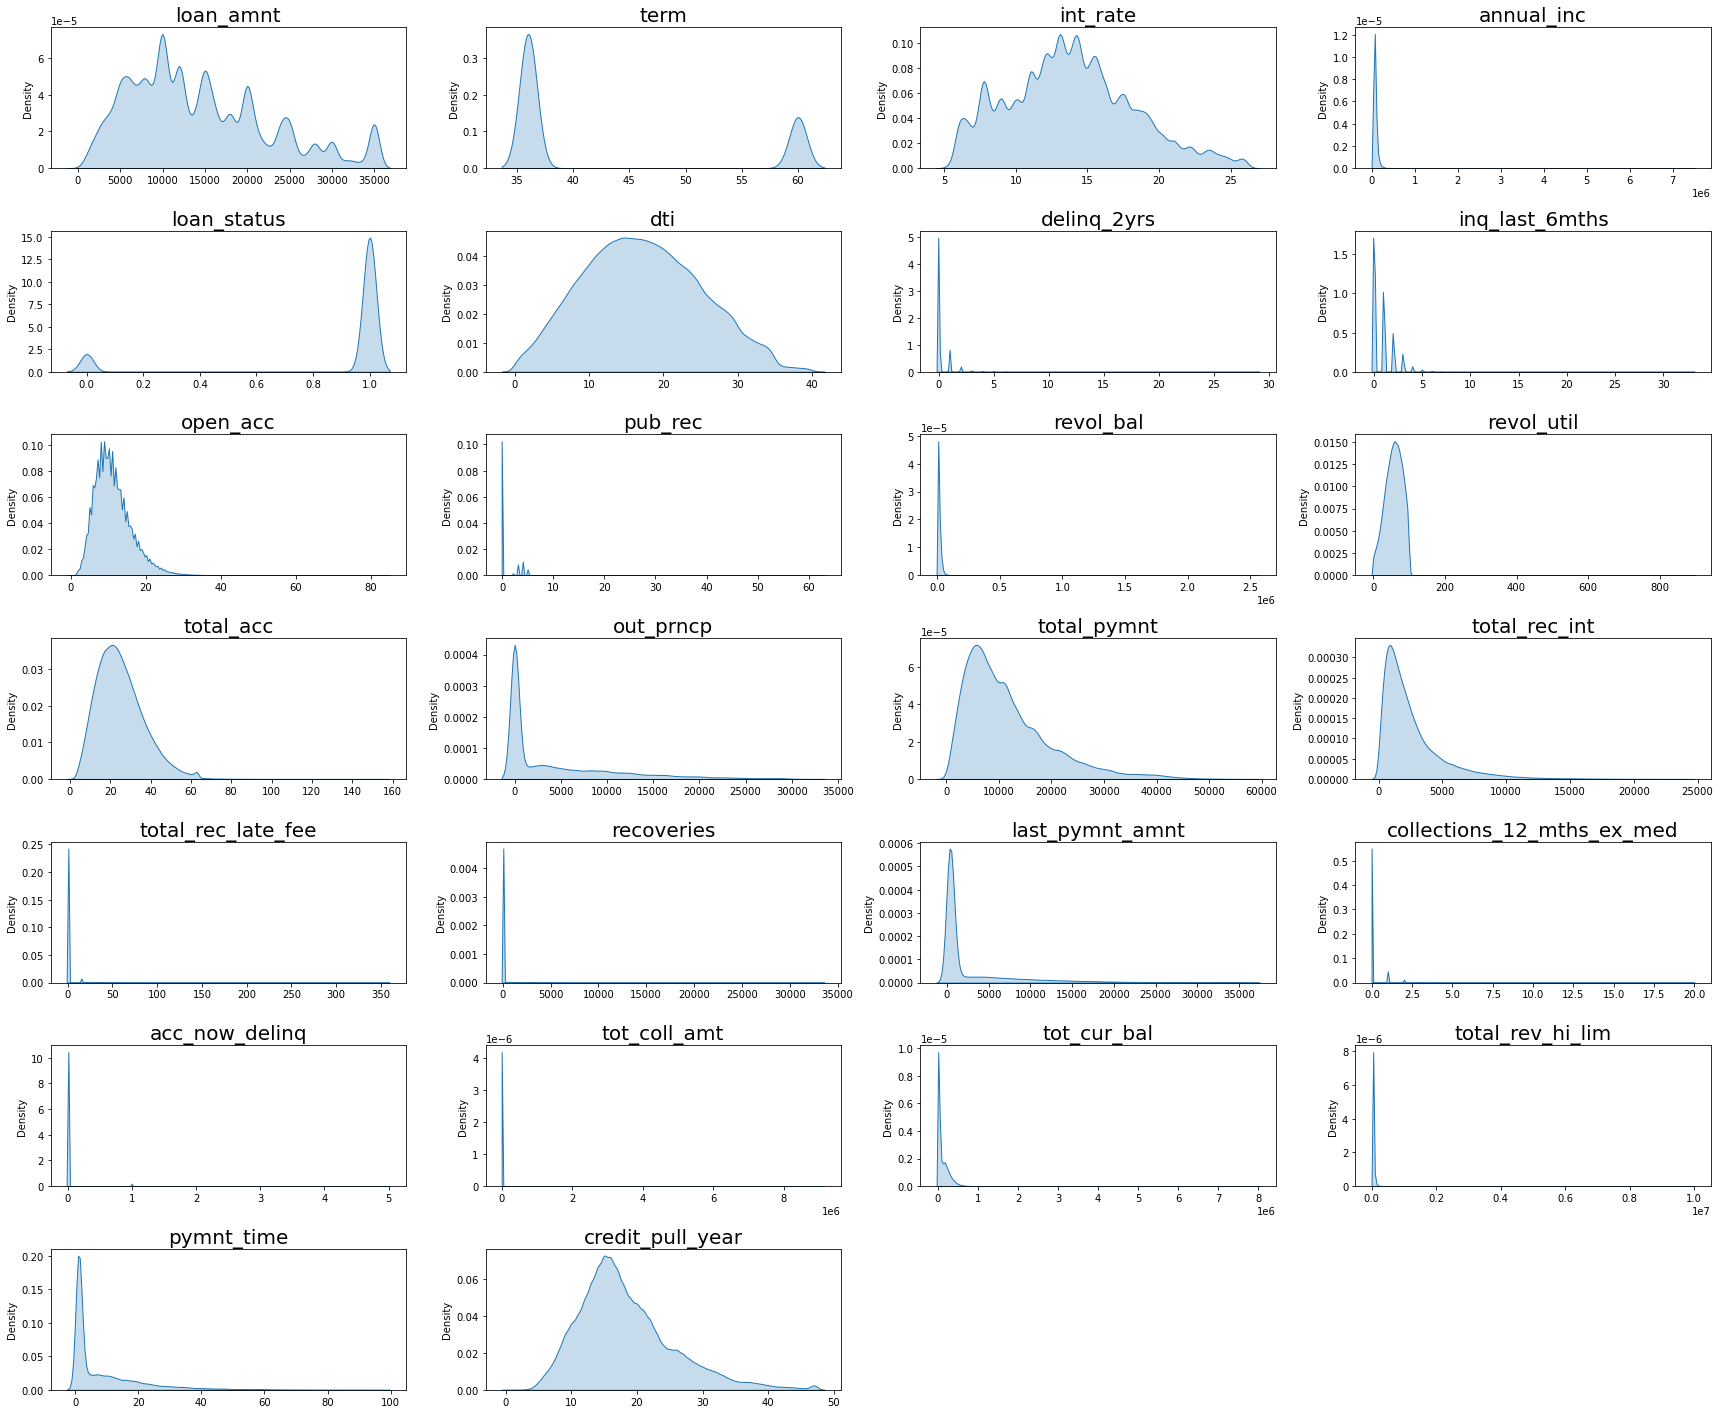

In [56]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=df_eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

mayoritas fitur numerik tidak berdistribusi normal,sehingga perlu dilakukan standarisasi

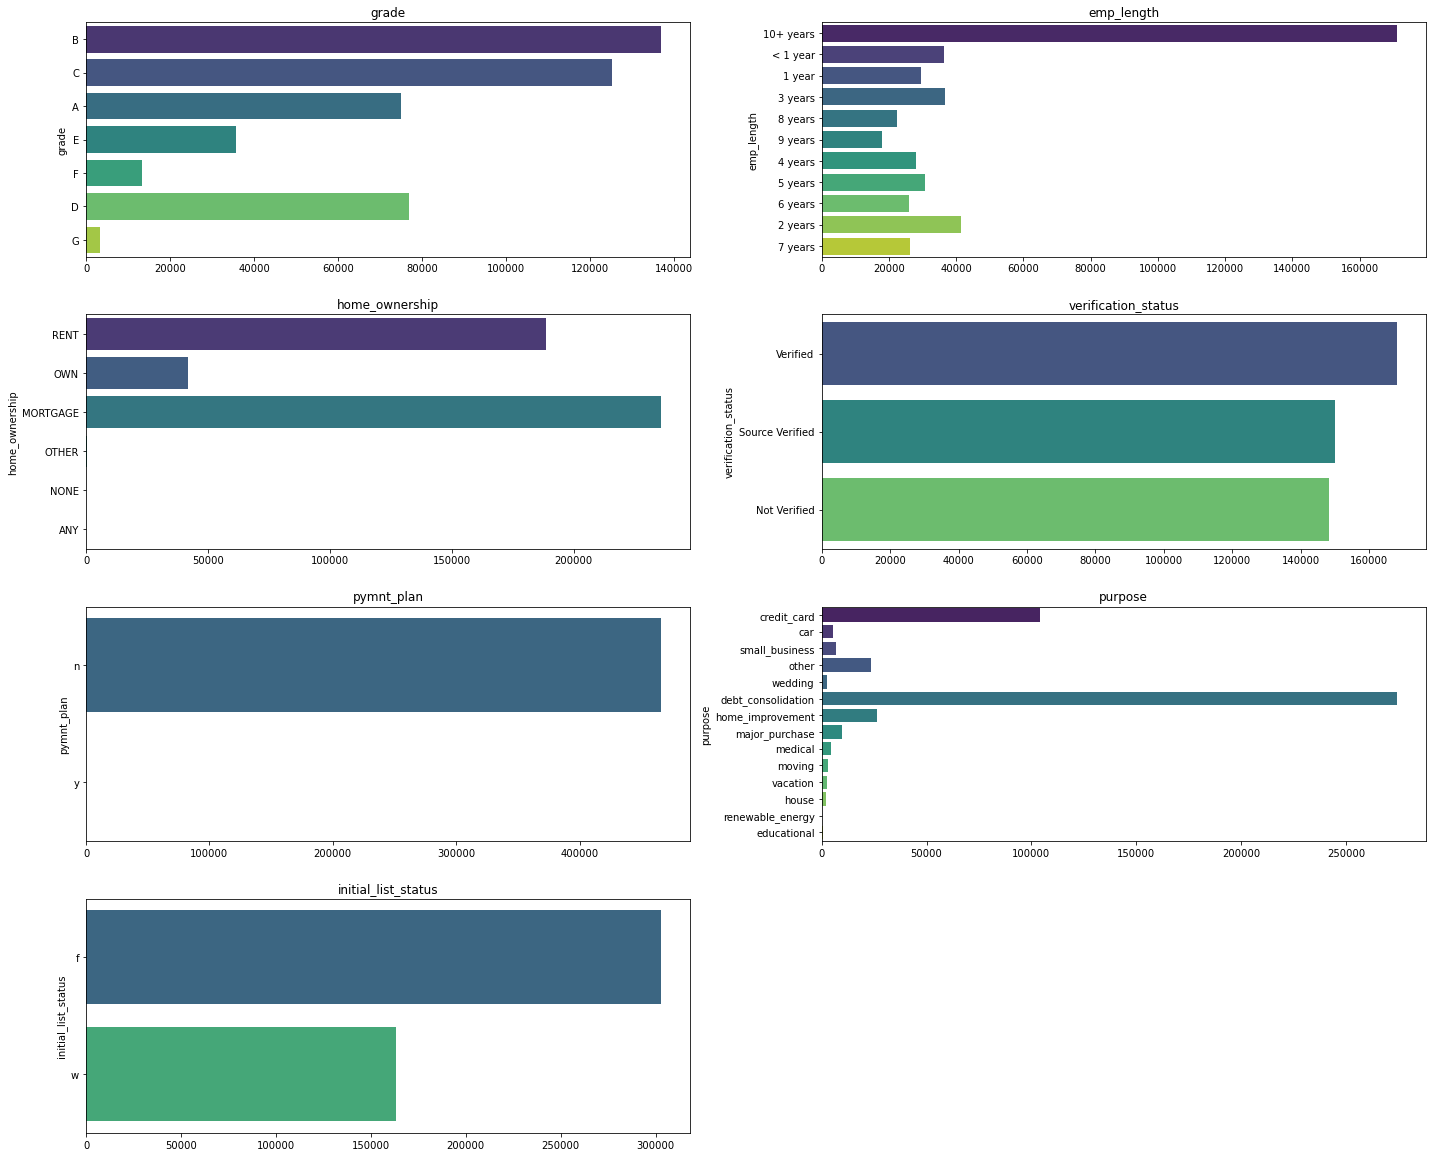

In [57]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=df_eda[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

Beberapa Insight yang didapatkan pada grafik diatas:<br>
1. Fitur grade didominasi dengan grade B
2. Fitur emp_lenght didominasi dengan emp_lenght >10 year
3. Fitur home_ownership didominasi dengan mortage
4. Fitur verification status didominasi verified
5. Fitur purpose didominasi oleh debt_consolidation
6. fitur initial_list_status didominasi oleh f
<br>
Fitur pymnt_plan memiliki masalah karena data keseluruhan hanya terisi value n sehingga diputuskan untuk membuang fitur ini

### Bivariate Analysis

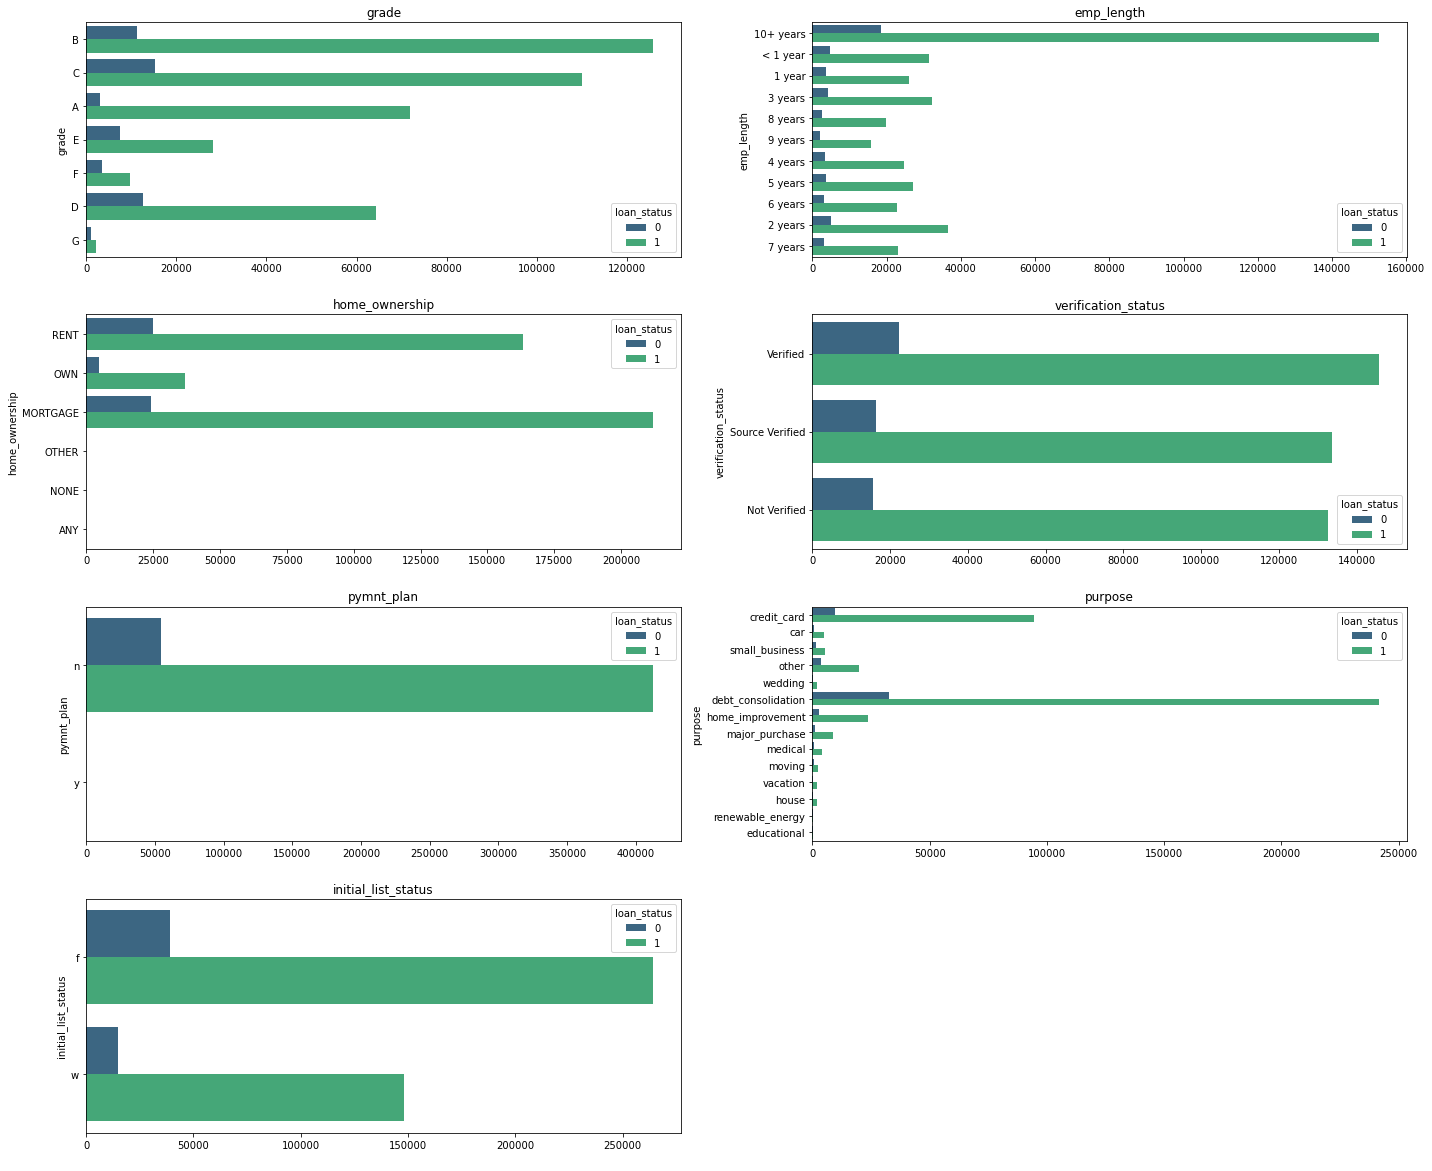

In [58]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(5,2,i+1)
    sns.countplot(y=df_eda[cat[i]], palette='viridis', hue=df_eda['loan_status'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

In [59]:
df_eda.drop(['pymnt_plan'], axis=1, inplace=True)

In [60]:
df_encode = df_eda.copy()

In [61]:
df_encode.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,36,10.65,B,10+ years,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,13,31
1,2500,60,15.27,C,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,0.0,0.0,0.0,34,14
2,2400,36,15.96,C,10+ years,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,20,15
3,10000,36,13.49,C,10+ years,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,0.0,0.0,13,19
4,3000,60,12.69,B,1 year,RENT,80000.0,Source Verified,1,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,0.0,0.0,1,20


### Categorical Encoding

### Label Encoding

In [62]:
df_encode['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [63]:
df_encode['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [64]:
df_encode['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [65]:
df_encode['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [66]:
df_encode['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [67]:
df_encode['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

`home_ownership` dengan value ANY, OTHER, and NONE akan digabungkan dengan value OTHER karena memili arti yang sama

In [68]:
df_encode['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [69]:
df_encode['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

* Mengganti label pada kolom `home_ownership` 
* Melakukan Label encoding `grade`

In [70]:
# Replace label with same characteristic 
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}

df_encode["home_ownership"] = df_encode["home_ownership"].map(target_dict)

In [71]:
# Label encode grade
target_dict = {'A':0,
              'B':1,
              'C':2,
              'D':3,
              'E':4,
              'F':5,
              'G':6}

df_encode['grade'] = df_encode['grade'].map(target_dict)

### One Hot Encoding

In [72]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  int64  
 2   int_rate                    466285 non-null  float64
 3   grade                       466285 non-null  int64  
 4   emp_length                  466285 non-null  object 
 5   home_ownership              466285 non-null  object 
 6   annual_inc                  466285 non-null  float64
 7   verification_status         466285 non-null  object 
 8   loan_status                 466285 non-null  int32  
 9   purpose                     466285 non-null  object 
 10  dti                         466285 non-null  float64
 11  delinq_2yrs                 466285 non-null  float64
 12  inq_last_6mths              466285 non-null  float64
 13  open_acc      

In [73]:
for cat in [['home_ownership','verification_status','initial_list_status','purpose','emp_length']]:
    onehots = pd.get_dummies(df_encode[cat], prefix = cat)

In [74]:
onehots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   home_ownership_MORTGAGE              466285 non-null  uint8
 1   home_ownership_OTHER                 466285 non-null  uint8
 2   home_ownership_OWN                   466285 non-null  uint8
 3   home_ownership_RENT                  466285 non-null  uint8
 4   verification_status_Not Verified     466285 non-null  uint8
 5   verification_status_Source Verified  466285 non-null  uint8
 6   verification_status_Verified         466285 non-null  uint8
 7   initial_list_status_f                466285 non-null  uint8
 8   initial_list_status_w                466285 non-null  uint8
 9   purpose_car                          466285 non-null  uint8
 10  purpose_credit_card                  466285 non-null  uint8
 11  purpose_debt_consolidation           46

In [75]:
df_encoded = df_encode.copy()

In [76]:
df_encoded.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,36,10.65,1,10+ years,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,13,31
1,2500,60,15.27,2,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,0.0,0.0,0.0,34,14
2,2400,36,15.96,2,10+ years,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,20,15
3,10000,36,13.49,2,10+ years,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,0.0,0.0,13,19
4,3000,60,12.69,1,1 year,RENT,80000.0,Source Verified,1,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,0.0,0.0,1,20


## Standarization

In [77]:
df_std = df_encoded.copy()

In [78]:
categorical_cols = [col for col in df_std.select_dtypes(include='object').columns.tolist()]

In [79]:
numerical_cols = [col for col in df_std.columns.tolist() if col not in categorical_cols + ['loan_status'] + ['grade']] 

In [80]:
categorical_cols 

['emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [81]:
numerical_cols

['loan_amnt',
 'term',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'pymnt_time',
 'credit_pull_year']

In [82]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in numerical_cols:
    df_std[col] = ss.fit_transform(df_std[[col]])
    
display(df_std.shape,df_std.head(5))

(466285, 32)

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,-1.124392,-0.616225,-0.729587,1,10+ years,RENT,-0.896549,Verified,1,credit_card,1.328632,-0.357012,0.178920,-1.641544,-0.31429,-0.124888,1.160093,-1.384880,f,-0.693944,-0.687137,-0.695548,-0.123464,-0.154549,-0.531492,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.333691,1.749055
1,-1.426088,1.622784,0.330634,2,< 1 year,RENT,-0.787386,Source Verified,0,car,-2.065791,-0.357012,3.843328,-1.641544,-0.31429,-0.703378,-1.971760,-1.815923,f,-0.693944,-1.274191,-0.867019,-0.123464,0.057470,-0.540846,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,2.047446,-0.586259
2,-1.438156,-0.616225,0.488979,2,10+ years,RENT,-1.110292,Not Verified,1,small_business,-1.082491,-0.357012,1.095022,-1.842050,-0.31429,-0.642003,1.783934,-1.298671,f,-0.693944,-1.032837,-0.799187,-0.123464,-0.154549,-0.445387,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.904943,-0.448888
3,-0.521001,-0.616225,-0.077850,2,10+ years,RENT,-0.438061,Source Verified,1,other,0.354248,-0.357012,0.178920,-0.238000,-0.31429,-0.514224,-1.482803,1.028959,f,-0.693944,0.082948,-0.152728,3.099264,-0.154549,-0.498032,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.333691,0.100598
4,-1.365749,1.622784,-0.261438,1,1 year,RENT,0.122313,Source Verified,1,other,0.091865,-0.357012,-0.737182,0.764532,-0.31429,0.558748,-0.096020,1.115168,f,-0.573268,-1.003980,-0.635962,-0.123464,-0.154549,-0.550184,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,-0.645597,0.237970


#### Drop fitur yang telah di encode dan menggabungkan fitur yang telah dilakukan onehot

In [83]:
df_std.drop(['home_ownership','verification_status','purpose','initial_list_status','emp_length'], axis=1, inplace=True)

In [84]:
df_std = df_std.join(onehots)

In [85]:
df_std.head()

,loan_amnt,term,int_rate,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,-1.124392,-0.616225,-0.729587,1,-0.896549,1,1.328632,-0.357012,0.178920,-1.641544,-0.31429,-0.124888,1.160093,-1.384880,-0.693944,-0.687137,-0.695548,-0.123464,-0.154549,-0.531492,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.333691,1.749055,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.426088,1.622784,0.330634,2,-0.787386,0,-2.065791,-0.357012,3.843328,-1.641544,-0.31429,-0.703378,-1.971760,-1.815923,-0.693944,-1.274191,-0.867019,-0.123464,0.057470,-0.540846,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,2.047446,-0.586259,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.438156,-0.616225,0.488979,2,-1.110292,1,-1.082491,-0.357012,1.095022,-1.842050,-0.31429,-0.642003,1.783934,-1.298671,-0.693944,-1.032837,-0.799187,-0.123464,-0.154549,-0.445387,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.904943,-0.448888,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.521001,-0.616225,-0.077850,2,-0.438061,1,0.354248,-0.357012,0.178920,-0.238000,-0.31429,-0.514224,-1.482803,1.028959,-0.693944,0.082948,-0.152728,3.099264,-0.154549,-0.498032,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.333691,0.100598,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-1.365749,1.622784,-0.261438,1,0.122313,1,0.091865,-0.357012,-0.737182,0.764532,-0.31429,0.558748,-0.096020,1.115168,-0.573268,-1.003980,-0.635962,-0.123464,-0.154549,-0.550184,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,-0.645597,0.237970,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [86]:
df_std.shape

(466285, 61)

## Modelling

In [87]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [88]:
df_model = df_std.copy()

In [89]:
df_model.head()

,loan_amnt,term,int_rate,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,-1.124392,-0.616225,-0.729587,1,-0.896549,1,1.328632,-0.357012,0.178920,-1.641544,-0.31429,-0.124888,1.160093,-1.384880,-0.693944,-0.687137,-0.695548,-0.123464,-0.154549,-0.531492,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.333691,1.749055,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.426088,1.622784,0.330634,2,-0.787386,0,-2.065791,-0.357012,3.843328,-1.641544,-0.31429,-0.703378,-1.971760,-1.815923,-0.693944,-1.274191,-0.867019,-0.123464,0.057470,-0.540846,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,2.047446,-0.586259,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.438156,-0.616225,0.488979,2,-1.110292,1,-1.082491,-0.357012,1.095022,-1.842050,-0.31429,-0.642003,1.783934,-1.298671,-0.693944,-1.032837,-0.799187,-0.123464,-0.154549,-0.445387,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.904943,-0.448888,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.521001,-0.616225,-0.077850,2,-0.438061,1,0.354248,-0.357012,0.178920,-0.238000,-0.31429,-0.514224,-1.482803,1.028959,-0.693944,0.082948,-0.152728,3.099264,-0.154549,-0.498032,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,0.333691,0.100598,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,-1.365749,1.622784,-0.261438,1,0.122313,1,0.091865,-0.357012,-0.737182,0.764532,-0.31429,0.558748,-0.096020,1.115168,-0.573268,-1.003980,-0.635962,-0.123464,-0.154549,-0.550184,-0.083608,-0.058307,-0.012089,-0.792648,-0.716575,-0.645597,0.237970,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [90]:
X = df_model.drop(['loan_status'], axis=1)
y = df_model['loan_status']

In [91]:
y.value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

### Imbalance Target

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((326399, 60), (139886, 60), (326399,), (139886,))

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
sm = SMOTE(random_state=24)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)


In [95]:
X_smote.shape, X_test.shape, y_smote.shape, y_train.shape

((577036, 60), (139886, 60), (577036,), (326399,))

### Train Model

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

logreg = LogisticRegression() 
logreg.fit(X_smote, y_smote)

y_pred_proba_train = logreg.predict_proba(X_train)[:][:,1]
y_pred_proba_test = logreg.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_pred_proba_train))
print('AUC Test Proba :', roc_auc_score(y_test, y_pred_proba_test))

AUC Train Proba : 0.9540818025261077
AUC Test Proba : 0.9512033761477237


In [97]:
y_pred_class = []

for i in y_pred_proba_test:
    if i > 0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86     16293
           1       0.97      1.00      0.98    123593

    accuracy                           0.97    139886
   macro avg       0.97      0.89      0.92    139886
weighted avg       0.97      0.97      0.97    139886



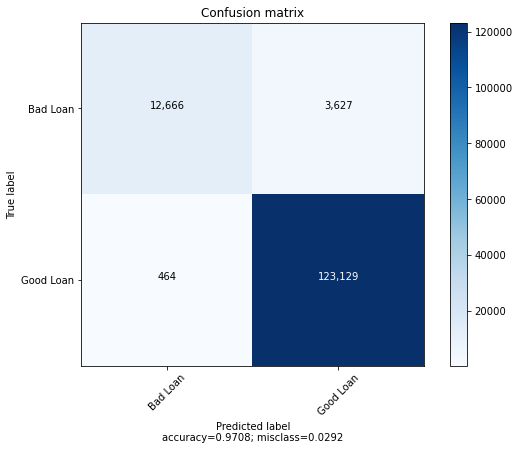

In [98]:
cm = confusion_matrix(y_test, y_pred_class)
target_names = ['Bad Loan','Good Loan']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

#### Hyperparameter

In [99]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)]
     }

logreg = LogisticRegression()

# search
logreg_clf = RandomizedSearchCV(logreg,
                            param,
                            scoring='roc_auc',
                            cv=5,
                            random_state = 24) 

search_logreg = logreg_clf.fit(X_smote,y_smote)
# best hyperparameters
search_logreg.best_params_

{'penalty': 'l2', 'C': 0.08108108108108109}

In [100]:
best_params = search_logreg.best_params_
logreg_tuning = LogisticRegression(**best_params)
logreg_tuning.fit(X_smote,y_smote)
y_train_pred_proba = logreg_tuning.predict_proba(X_train)[:][:,1]
y_test_pred_lr_proba = logreg_tuning.predict_proba(X_test)[:][:,1]

print('AUC Train Proba :', roc_auc_score(y_train, y_train_pred_proba))
print('AUC Test Proba :', roc_auc_score(y_test, y_test_pred_lr_proba))

AUC Train Proba : 0.9541402942002748
AUC Test Proba : 0.9513489230966165


In [101]:
y_pred_class_2 = []

for i in y_test_pred_lr_proba:
    if i > 0.5:
        y_pred_class_2.append(1)
    else:
        y_pred_class_2.append(0)

print(classification_report(y_test, y_pred_class_2))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86     16293
           1       0.97      1.00      0.98    123593

    accuracy                           0.97    139886
   macro avg       0.97      0.89      0.92    139886
weighted avg       0.97      0.97      0.97    139886



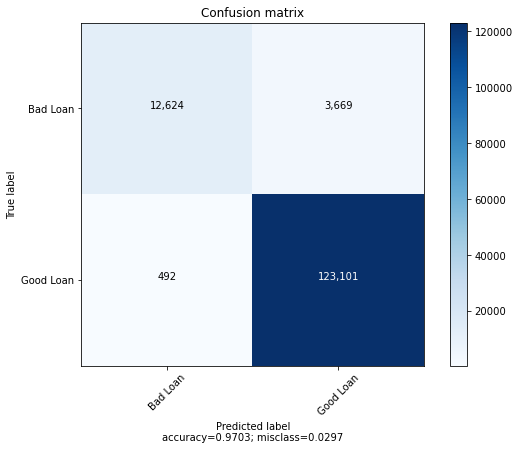

In [102]:
cm = confusion_matrix(y_test, y_pred_class_2)
target_names = ['Bad Loan','Good Loan']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [103]:
import statsmodels.api as sm
X2 = sm.add_constant(X_smote)
est = sm.OLS(y_smote, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 1.874e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:47:18   Log-Likelihood:            -1.0686e+05
No. Observations:              577036   AIC:                         2.138e+05
Df Residuals:                  576975   BIC:                         2.145e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [104]:
# Converting statsmodels summary object to Pandas Dataframe,
df_importance = pd.read_html(est2.summary().tables[1].as_html(),header=0,index_col=0)[0]

# find odds_ratio
for i in df_importance['coef']:
    if i == 0 :
        df_importance['odds_ratio'] = 0
    else:
        df_importance['odds_ratio'] = np.exp(df_importance['coef'])
        
# show top 5 highest contribution
df_importance[df_importance['P>|t|'] <= 0.05].sort_values(by = ['coef'],ascending = [False]).head(5)

,coef,std err,t,P>|t|,[0.025,0.975],odds_ratio
purpose_vacation,0.3603,0.007,52.048,0.0,0.347,0.374,1.433759
purpose_car,0.3458,0.005,72.360,0.0,0.336,0.355,1.413120
emp_length_9 years,0.3443,0.003,130.653,0.0,0.339,0.349,1.411002
emp_length_8 years,0.3414,0.002,143.553,0.0,0.337,0.346,1.406916
emp_length_4 years,0.3347,0.002,157.953,0.0,0.331,0.339,1.397521


`Purpose` dan `emp_length` memiliki kontribusi positif dalam menentukan `loan status`. <br>
* Peminjam yang meminjam dengan tujuan untuk vacation dan car,probabilitas mereka untuk menjadi peminjam good loan akan meningkat 1,4 kali
* Peminjam yang meminjam dengan pengalaman pekerjaan 4 ,8, dan 9 tahun,probabilitas mereka untuk menjadi peminjam good loan akan meningkat 1,4 kali

In [105]:
df_importance.sort_values(by = ['coef'],ascending = [True]).head(5)

,coef,std err,t,P>|t|,[0.025,0.975],odds_ratio
const,-0.3052,0.003,-100.565,0.0,-0.311,-0.299,0.736976
loan_amnt,-0.2076,0.001,-250.583,0.0,-0.209,-0.206,0.812532
total_rec_int,-0.1224,0.001,-116.633,0.0,-0.124,-0.120,0.884794
int_rate,-0.0858,0.001,-69.605,0.0,-0.088,-0.083,0.917778
pymnt_time,-0.0345,0.000,-75.959,0.0,-0.035,-0.034,0.966088


`loan_amnt`,`total_rec_int`,`int_rate`,dan `pymnt_time` memiliki kontribusi negatif dalam menentukan `loan status`

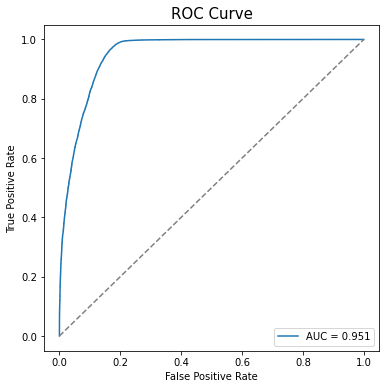

In [106]:
fpr, tpr, tr = roc_curve(y_test, y_test_pred_lr_proba)
auc = roc_auc_score(y_test, y_test_pred_lr_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

## Kolmogrov-smirnov

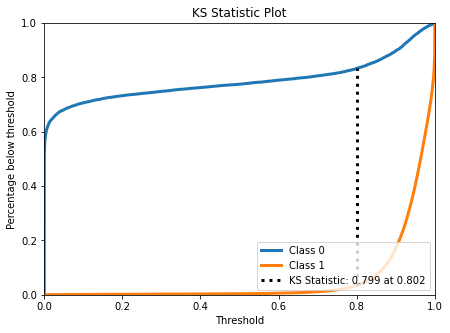

In [107]:
import scikitplot as skplt
y_pred_proba = logreg_tuning.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));


## Visualization Based on feature importance model

In [108]:
df_vis = df_encoded

In [109]:
df_vis['status_loan'] = np.where(df_vis['loan_status']==1,'Good loan','Bad loan')
df_vis['status_loan'].value_counts()

Good loan    412111
Bad loan      54174
Name: status_loan, dtype: int64

In [110]:
df_vis.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,status_loan
0,5000,36,10.65,1,10+ years,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,5861.071414,861.07,0.00,0.00,171.62,0.0,0.0,0.0,0.0,0.0,13,31,Good loan
1,2500,60,15.27,2,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,1008.710000,435.17,0.00,117.08,119.66,0.0,0.0,0.0,0.0,0.0,34,14,Bad loan
2,2400,36,15.96,2,10+ years,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,3003.653644,603.65,0.00,0.00,649.91,0.0,0.0,0.0,0.0,0.0,20,15,Good loan
3,10000,36,13.49,2,10+ years,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,12226.302210,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,0.0,0.0,13,19,Good loan
4,3000,60,12.69,1,1 year,RENT,80000.0,Source Verified,1,other,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,3242.170000,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,0.0,0.0,1,20,Good loan


In [111]:
df_vis_emp = df_vis.groupby(['emp_length','status_loan']).agg(num_cust=('loan_status','count')).reset_index()
total_cust_emp = df_vis_emp.groupby(['emp_length']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_emp = df_vis_emp.merge(total_cust_emp,on = ['emp_length'])
df_vis_emp['percentage'] = round((df_vis_emp['num_cust']/df_vis_emp['total_cust'])*100,2) 

In [112]:
df_vis_emp

,emp_length,status_loan,num_cust,total_cust,percentage
0,1 year,Bad loan,3643,29622,12.30
1,1 year,Good loan,25979,29622,87.70
2,10+ years,Bad loan,18513,171057,10.82
3,10+ years,Good loan,152544,171057,89.18
4,2 years,Bad loan,4913,41373,11.87
5,2 years,Good loan,36460,41373,88.13
6,3 years,Bad loan,4302,36596,11.76
7,3 years,Good loan,32294,36596,88.24
8,4 years,Bad loan,3300,28023,11.78
9,4 years,Good loan,24723,28023,88.22


In [113]:
df_vis_emp_good = df_vis_emp[df_vis_emp['status_loan'] == 'Good loan']

In [114]:
df_vis_emp_good

,emp_length,status_loan,num_cust,total_cust,percentage
1,1 year,Good loan,25979,29622,87.70
3,10+ years,Good loan,152544,171057,89.18
5,2 years,Good loan,36460,41373,88.13
7,3 years,Good loan,32294,36596,88.24
9,4 years,Good loan,24723,28023,88.22
11,5 years,Good loan,27041,30774,87.87
13,6 years,Good loan,22895,26112,87.68
15,7 years,Good loan,23133,26180,88.36
17,8 years,Good loan,19805,22395,88.43
19,9 years,Good loan,15761,17888,88.11


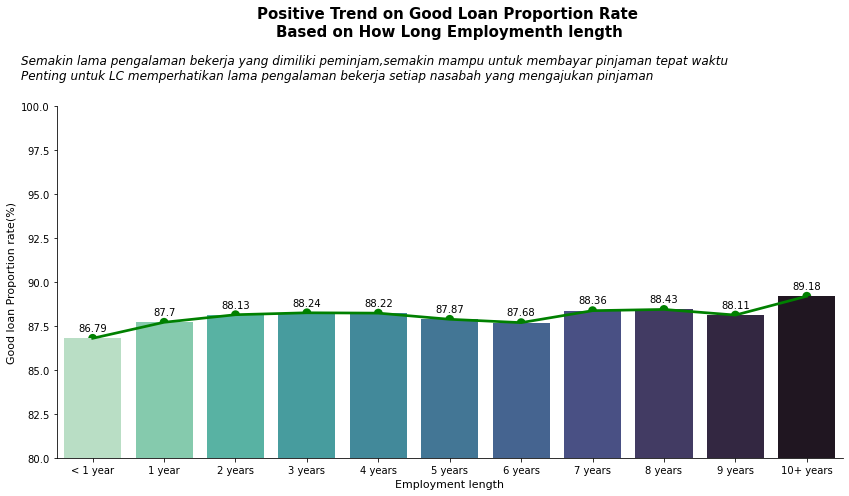

In [115]:
fig, ax = plt.subplots(figsize=(12,7))
plt.title("Positive Trend on Good Loan Proportion Rate \nBased on How Long Employmenth length", fontsize=15, color='black', weight='bold', pad=70)
plt.text(x=-1, y=101.5, s="Semakin lama pengalaman bekerja yang dimiliki peminjam,semakin mampu untuk membayar pinjaman tepat waktu\nPenting untuk LC memperhatikan lama pengalaman bekerja setiap nasabah yang mengajukan pinjaman", fontsize=12, fontstyle='italic')

sns.barplot(x='emp_length', y='percentage', data=df_vis_emp_good,order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'],palette = 'mako_r')

sns.pointplot(x='emp_length',y='percentage',data=df_vis_emp_good,color = 'green',
              ci=None, order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

plt.xlabel('Employment length', fontsize=11)
plt.ylabel('Good loan Proportion rate(%)', fontsize=11)
plt.ylim(80, 100)

plt.bar_label(ax.containers[0], padding=5)
sns.despine()
plt.tight_layout()

In [116]:
df_vis_purpose = df_vis.groupby(['purpose','status_loan']).agg(num_cust=('loan_status','count')).reset_index()
df_vis_purpose

,purpose,status_loan,num_cust
0,car,Bad loan,539
1,car,Good loan,4858
2,credit_card,Bad loan,9471
3,credit_card,Good loan,94686
4,debt_consolidation,Bad loan,32644
5,debt_consolidation,Good loan,241551
6,educational,Bad loan,153
7,educational,Good loan,269
8,home_improvement,Bad loan,2815
9,home_improvement,Good loan,23722


In [117]:
total_cust_purpose = df_vis_purpose.groupby(['purpose']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_purpose = df_vis_purpose.merge(total_cust_purpose,on = ['purpose'])

In [118]:
df_vis_purpose['percentage'] = round((df_vis_purpose['num_cust']/df_vis_purpose['total_cust'])*100,2)

In [119]:
df_vis_purpose = df_vis_purpose.sort_values('percentage',ascending = False)

In [120]:
df_vis_purpose

,purpose,status_loan,num_cust,total_cust,percentage
3,credit_card,Good loan,94686,104157,90.91
1,car,Good loan,4858,5397,90.01
9,home_improvement,Good loan,23722,26537,89.39
13,major_purchase,Good loan,8766,9828,89.19
5,debt_consolidation,Good loan,241551,274195,88.09
25,vacation,Good loan,2169,2487,87.21
27,wedding,Good loan,2015,2343,86.00
15,medical,Good loan,3942,4602,85.66
19,other,Good loan,20048,23690,84.63
11,house,Good loan,1914,2269,84.35


In [121]:
df_vis_purpose_bad = df_vis_purpose[df_vis_purpose['status_loan'] == 'Bad loan']

In [122]:
df_vis_purpose_bad

,purpose,status_loan,num_cust,total_cust,percentage
6,educational,Bad loan,153,422,36.26
22,small_business,Bad loan,1635,7013,23.31
16,moving,Bad loan,496,2994,16.57
20,renewable_energy,Bad loan,56,351,15.95
10,house,Bad loan,355,2269,15.65
18,other,Bad loan,3642,23690,15.37
14,medical,Bad loan,660,4602,14.34
26,wedding,Bad loan,328,2343,14.00
24,vacation,Bad loan,318,2487,12.79
4,debt_consolidation,Bad loan,32644,274195,11.91


In [123]:
# Adjust Label purpose
target_dict = {'educational': 'education',
              'small_business':'business',
              'moving':'moving',
              'renewable_energy':'energy',
              'house':'house',
              'other':'other',
              'medical':'medical',
              'wedding':'wedding',
              'vacation':'vacation',
              'debt_consolidation':'debt cons',
              'major_purchase': 'major purchase',
              'home_improvement':'home_imp',
              'car':'car',
              'credit_card':'credit card'}

df_vis_purpose_bad['purpose'] = df_vis_purpose_bad['purpose'].map(target_dict)

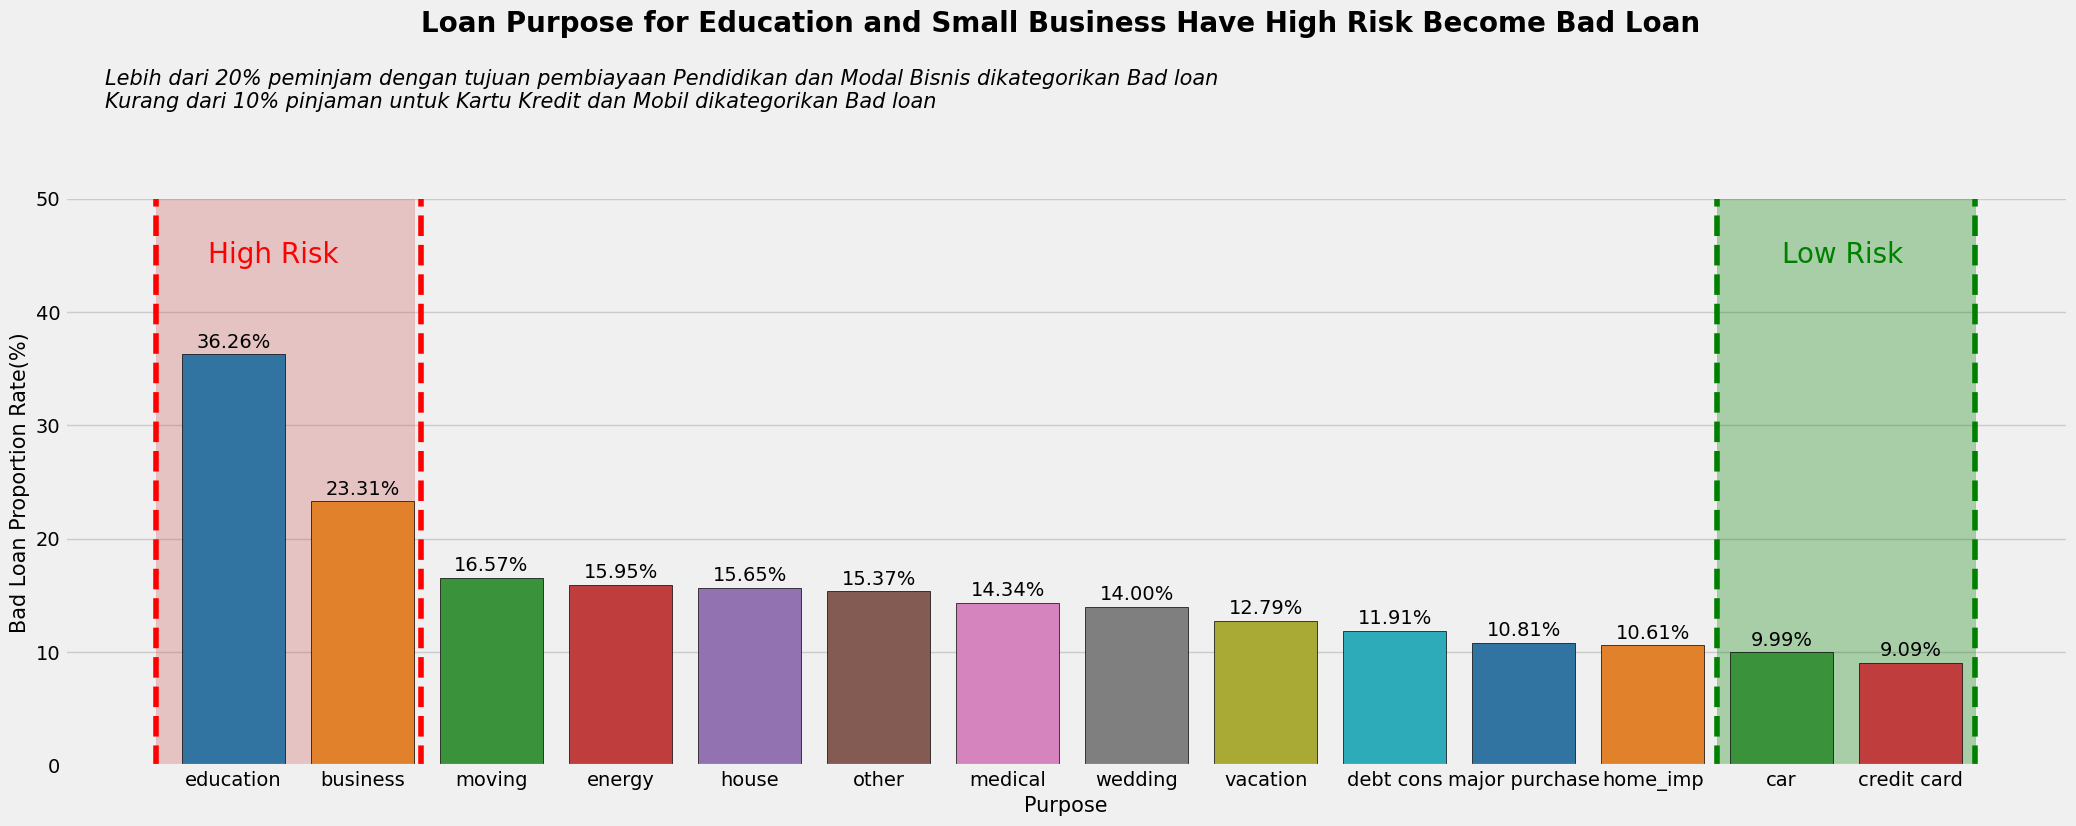

In [141]:
from matplotlib import style
fig, ax = plt.subplots(figsize=(23, 7))
plt.style.use('fivethirtyeight')
plt.title("Loan Purpose for Education and Small Business Have High Risk Become Bad Loan ", fontsize=20, color='black', weight='bold',pad = 120)
plt.text(x=-1, y=58, s="Lebih dari 20% peminjam dengan tujuan pembiayaan Pendidikan dan Modal Bisnis dikategorikan Bad loan\nKurang dari 10% pinjaman untuk Kartu Kredit dan Mobil dikategorikan Bad loan",
         fontsize=15, fontstyle='italic')
sns.barplot(x='purpose', y='percentage', data=df_vis_purpose_bad, edgecolor='black',palette = 'tab10')

plt.xlabel('Purpose', fontsize=15)
plt.ylabel('Bad Loan Proportion Rate(%)', fontsize=15)
plt.ylim(0, 50)

plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')

plt.axvline(-0.60, ls='--', color='red')
plt.axvline(1.45, ls='--', color='red')
plt.stackplot(np.arange(-0.6,2), [[100]], color='indianred', alpha=0.3)
plt.text(x=-0.2, y=45, s='High Risk', fontsize=20, color='red', va='center')

plt.axvline(11.5, ls='--', color='green')
plt.axvline(13.5, ls='--', color='green')
plt.stackplot(np.arange(11.5,14), [[100]], color='green', alpha=0.3)
plt.text(x=12, y=45, s='Low Risk', fontsize=20, color='green', va='center')

sns.despine()

### Loan Amount

In [125]:
df_vis_loan = df_vis.copy()

In [126]:
df_vis_loan['int_rate_bin'] = pd.cut(df_vis_loan['int_rate'],5)
df_vis_loan['int_rate_bin'].value_counts()

(9.548, 13.676]     153360
(13.676, 17.804]    147973
(5.399, 9.548]       83978
(17.804, 21.932]     57785
(21.932, 26.06]      23189
Name: int_rate_bin, dtype: int64

In [127]:
df_vis_loan['int_rate_bin'] = np.where((df_vis_loan['int_rate']>5.399)&(df_vis_loan['int_rate']<=9.548),'5.3-9.5',
                    np.where((df_vis_loan['int_rate']>9.548)&(df_vis_loan['int_rate']<=13.676),'9.6-13.6',
                    np.where((df_vis_loan['int_rate']>13.676)&(df_vis_loan['int_rate']<=17.804),'13.7-17.8',
                    np.where((df_vis_loan['int_rate']>17.804)&(df_vis_loan['int_rate']<=21.932),'17.9-21.9','>22'))))

In [128]:
df_vis_loan['int_rate_bin'].value_counts()

9.6-13.6     153360
13.7-17.8    147973
5.3-9.5       83978
17.9-21.9     57785
>22           23189
Name: int_rate_bin, dtype: int64

In [129]:
order_list = ['5.3-9.5','9.6-13.6','13.7-17.8','17.9-21.9','>22']

In [130]:
pal = ['#46ff77', '#ff5246']
pal2 = ['#5f46ff', '#ffaf46']

Text(0.5, 0, 'Interest Rate')

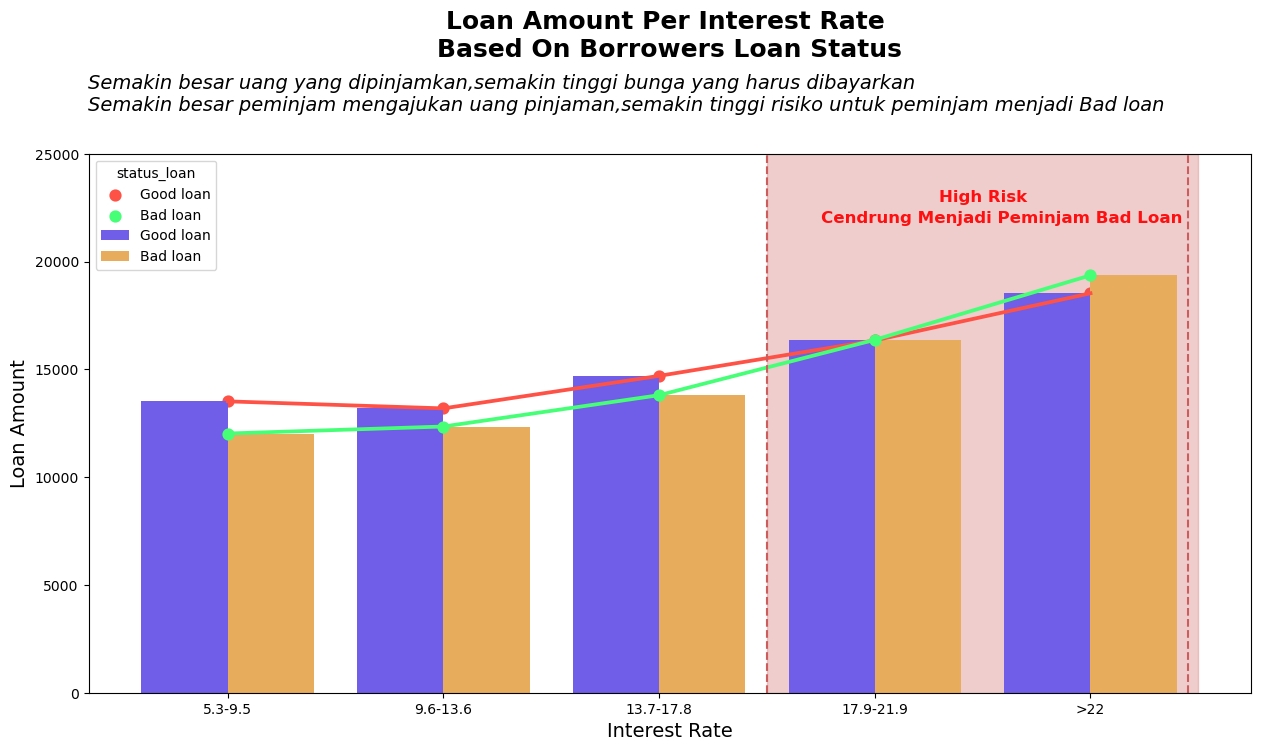

In [148]:
plt.style.use('default')
plt.figure(figsize=(15,7))
sns.pointplot(x='int_rate_bin',y='loan_amnt',data=df_vis_loan,palette=pal, 
              hue='status_loan',ci=None, order=order_list)

sns.barplot(x='int_rate_bin',y='loan_amnt',data=df_vis_loan,palette=pal2, 
              hue='status_loan',ci=None, order=order_list)

plt.axvline(2.5, ls='--', color='indianred')
plt.axvline(4.45, ls='--', color='indianred')
plt.stackplot(np.arange(2.5,4.55), [[25000]], color='indianred', alpha=0.3)
plt.text(x=3.3, y=23000, s='High Risk', fontsize=12, 
         color='#ff0f0f', va='center', weight='extra bold')
plt.text(x=2.75, y=22000, s='Cendrung Menjadi Peminjam Bad Loan', fontsize=12, 
         color='#ff0f0f', va='center', weight='extra bold')


plt.ylim(0,25000)

plt.title('Loan Amount Per Interest Rate \nBased On Borrowers Loan Status', 
          fontsize=18, weight='extra bold', pad=70)
plt.text(x=-0.65, y=27000, s='Semakin besar uang yang dipinjamkan,semakin tinggi bunga yang harus dibayarkan\nSemakin besar peminjam mengajukan uang pinjaman,semakin tinggi risiko untuk peminjam menjadi Bad loan' ,
         fontstyle='italic', fontsize=14)

plt.ylabel('Loan Amount', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)

In [132]:
df_vis_pymnt = df_vis.copy()

In [133]:
pymnt_time_list = []
for i in df_vis_pymnt['pymnt_time']:
    if i <= 12 :
        group = '1 Year'
    elif i >= 13 and i <= 24:
        group = '2 Year'
    elif i >= 25 and i <= 36:
        group = '3 Year'
    elif i >=37 and i <= 48:
        group = '4 Year'
    elif i >=49 and i <= 60:
        group = '5 Year'
    else: 
        group = 'Over 5 Year'
    pymnt_time_list.append(group)
df_vis_pymnt['pymnt_time_group'] = pymnt_time_list

In [134]:
df_vis_pymnt['pymnt_time_group'].value_counts()

1 Year         345354
2 Year          71542
3 Year          29046
4 Year          12257
5 Year           5276
Over 5 Year      2810
Name: pymnt_time_group, dtype: int64

In [135]:
df_vis_pymnt_group = df_vis_pymnt.groupby(['pymnt_time_group','status_loan']).agg(num_cust=('loan_status','count')).reset_index()
total_cust_pymnt= df_vis_pymnt_group.groupby(['pymnt_time_group']).agg(total_cust=('num_cust','sum')).reset_index()
df_vis_pymnt_group = df_vis_pymnt_group.merge(total_cust_pymnt,on = ['pymnt_time_group'])
df_vis_pymnt_group['percentage'] = round((df_vis_pymnt_group['num_cust']/df_vis_pymnt_group['total_cust'])*100,2) 

In [136]:
df_vis_pymnt_group

,pymnt_time_group,status_loan,num_cust,total_cust,percentage
0,1 Year,Bad loan,26703,345354,7.73
1,1 Year,Good loan,318651,345354,92.27
2,2 Year,Bad loan,15790,71542,22.07
3,2 Year,Good loan,55752,71542,77.93
4,3 Year,Bad loan,6971,29046,24.00
5,3 Year,Good loan,22075,29046,76.00
6,4 Year,Bad loan,2764,12257,22.55
7,4 Year,Good loan,9493,12257,77.45
8,5 Year,Bad loan,1113,5276,21.10
9,5 Year,Good loan,4163,5276,78.90


In [137]:
pal = ['#ff5246', '#46ff77']
pal2 = ['#5f46ff', '#ffaf46']

In [138]:
time_list = ['1 Year','2 Year','3 Year','4 Year','5 Year','Over 5 Year']

Text(0.5, 0, 'Payment Time')

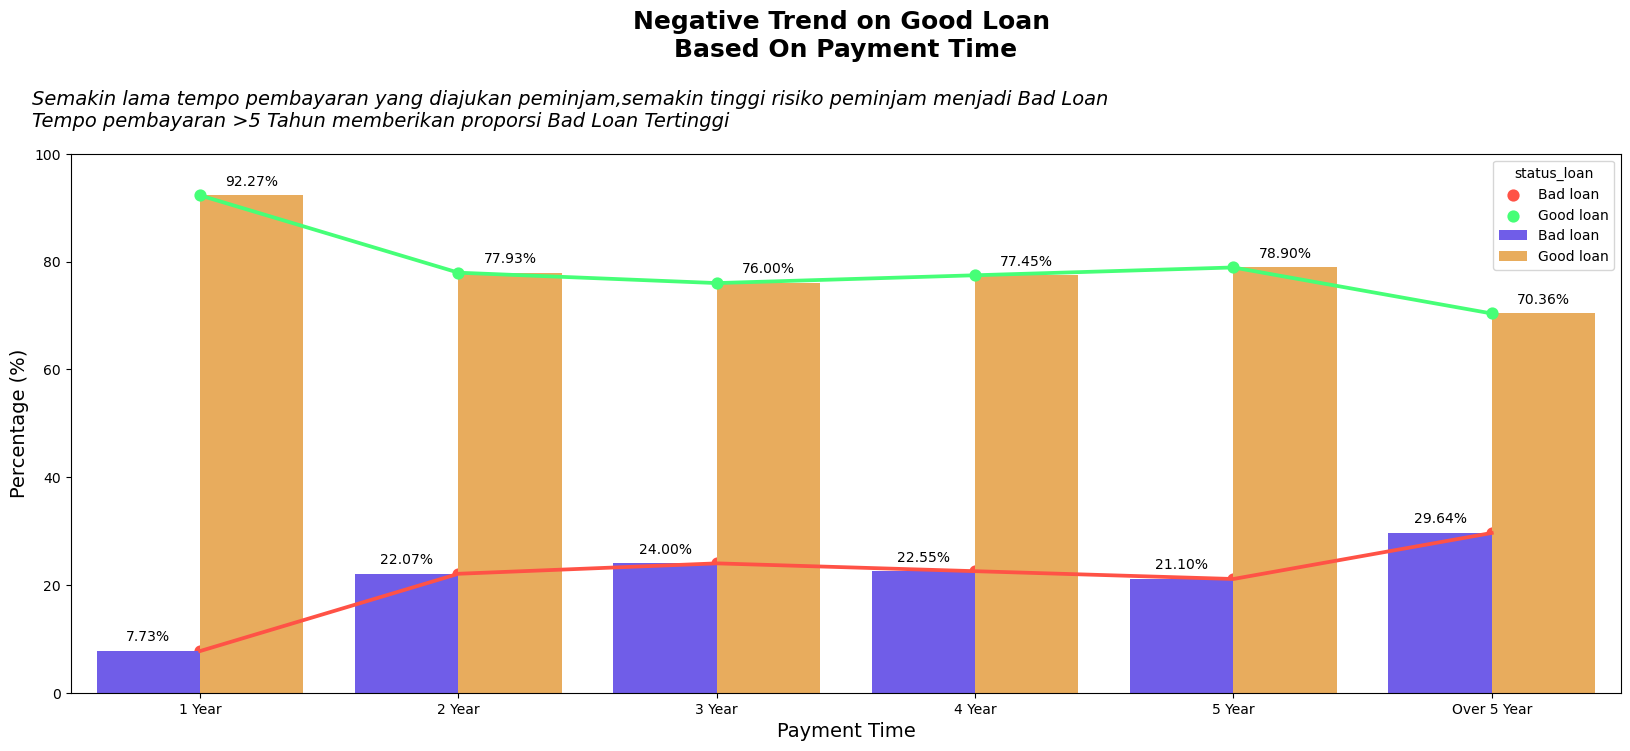

In [139]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(20, 7))
sns.pointplot(x='pymnt_time_group',y='percentage',data=df_vis_pymnt_group,palette=pal, 
              hue='status_loan',ci=None, order=time_list)

sns.barplot(x='pymnt_time_group',y='percentage',data=df_vis_pymnt_group,palette=pal2, 
              hue='status_loan',ci=None, order=time_list)

plt.bar_label(ax.containers[0], padding=5, fmt='%.2f%%')
plt.bar_label(ax.containers[1], padding=5, fmt='%.2f%%')

plt.ylim(0,100)
plt.title('Negative Trend on Good Loan \nBased On Payment Time', 
          fontsize=18, weight='extra bold', pad=70)
plt.text(x=-0.65, y=105, s='Semakin lama tempo pembayaran yang diajukan peminjam,semakin tinggi risiko peminjam menjadi Bad Loan\nTempo pembayaran >5 Tahun memberikan proporsi Bad Loan Tertinggi' ,
         fontstyle='italic', fontsize=14)

plt.ylabel('Percentage (%)', fontsize=14)
plt.xlabel('Payment Time', fontsize=14)

## Summary

Perusahaan pemberi pinjaman (LC) bisa memerhatikan informasi nasabah yang cukup penting untuk dipertimbangkan untuk diberi pinjaman yaitu:
1. Jumlah Pinjaman; Jumlah pinjaman yang diberikan berkaitan dengan suku bunga yang harus dibayarkan.Semakin besar jumlah pinjaman maka suku bunga yang harus dibayarkan semakin besar<br> Perusahaan bisa merekomendasi jumlah pinjaman yang tidak terlalu berisiko untuk menjadi Bad loan.Merekomendasikan jumlah pinjaman dengan bunga dibawah 17% dapat mengurangi risiko Bad loan
2. Tempo Pinjaman; Semakin lama tempo pinjaman yang harus dibayarkan nasabah justru meningkatkan risiko nasabah tersebut menjadi Bad loan<br> Membatasi tempo pinjaman maksimal 5 Tahun dapat mengurangi risiko Bad loan
3. Tujuan peminjaman; Pinjaman untuk pendidikan dan modal bisnis berisiko tinggi untuk diberikan karena proporsi peminjam bad loan >20%. LC bisa fokus memberi pinjaman untuk nasabah yang bertujuan untuk memiliki mobil dan penggunaan credit card karena nasabah tersebut cuku minim risiko menjadi Bad loan
4. Lama Bekerja; Pada visualisasi telah dibuktikan bahwa semakin lama pengalaman bekerja nasabah,semakin mampu nasabah tersebut membayar pinjaman sehingga meningkatkan Good loan. LC juga bisa menambahkan status pekerjaan apakah pegawai negeri,pegawai swasta,wirausaha untuk dapat menjelaskan seberapa mampu nasabah tersebut membayar pinjaman kedepannya